# **Community Topic**

> This file made for demostarting various examples of community topic.


**What is Community Topic?**

Community Topic, is based on mining communities of terms from term-occurrence networks extracted from the documents. In addition to providing interpretable collections of terms as topics, the network representation provides a natural topic structure. The topics form a network, so topic similarity is inferred from the weights of the edges between them. Super-topics can be found by iteratively applying community detection on the topic network, grouping similar topics together. Sub-topics can be found by iteratively applying community detection on a single topic community. This can be done dynamically, with the user or conversation agent moving up and down the topic hierarchy as desired.

> Examples Covered
  - Flat Topic Modelling
  - Hierarchical Topic Modelling
  - Topic Modelling on Spanish Language






### **1. Flat Topic Modelling**

In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install communitytopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for communitytopic: filename=communitytopic-0.1-py3-none-any.whl size=15086 sha256=be5079efc1effd26ade0eb4bbcd35a0c8d8630e3dcf506961e647b7b72d6f804
  Stored in directory: /root/.cache/pip/wheels/47/1c/48/f3752cd56631f5ace2ce31c084c4f6762b80629650c59ed3cc
Successfully built communitytopic


In [ ]:
# Import necessary class of the library

from communitytopic import CommunityTopic
from communitytopic import PreProcessing

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Load raw corpus as the dataset, here we are using BBC dataset.

with open("/content/drive/My Drive/bbc_train.txt", "r", encoding='utf-8') as f:
      bbc_train = f.read()
      
with open("/content/drive/My Drive/bbc_test.txt", "r", encoding='utf-8') as f:
      bbc_test = f.read()

In [ ]:
# Performing pre-processing on training and testing corpus

tokenized_bbc_train_sents, tokenized_bbc_train_docs, tokenized_bbc_test_docs, dictionary = PreProcessing.do_preprocessing(
        train=bbc_train,
        test=bbc_test,
        ner=1,
        pos_filter=3,
        phrases="npmi",
        phrase_threshold=0.35,
        language="en")

Preprocessing documents...
Preprocessing completed in 104.7971420288086 seconds


In [ ]:
# Applying Flat Community Topic algorithm on pre-processed data

community_topic = CommunityTopic(train_corpus=tokenized_bbc_train_sents,  dictionary=dictionary)
community_topic.fit()

Generating network...
Finding topic communities...
Topics found in 0.14843440055847168 seconds
Sorting topics...
Topics sorted in 0.9475181102752686 seconds


In [ ]:
#  Get topic words founded by abovr algorithm

topic_words = community_topic.get_topics_words_topn(10)
print(topic_words)

[['year', 'company', 'world', 'growth', 'firm', 'economy', 'market', 'years', 'sales', 'months'], ['government', 'labour', 'election', 'party', 'blair', 'plans', 'minister', 'britain', 'tories', 'bill'], ['people', 'technology', 'users', 'music', 'software', 'phone', 'services', 'way', 'microsoft', 'service'], ['time', 'game', 'england', 'wales', 'ireland', 'france', 'players', 'team', 'match', 'chelsea'], ['film', 'award', 'awards', 'actor', 'director', 'number', 'star', 'films', 'actress', 'oscar']]


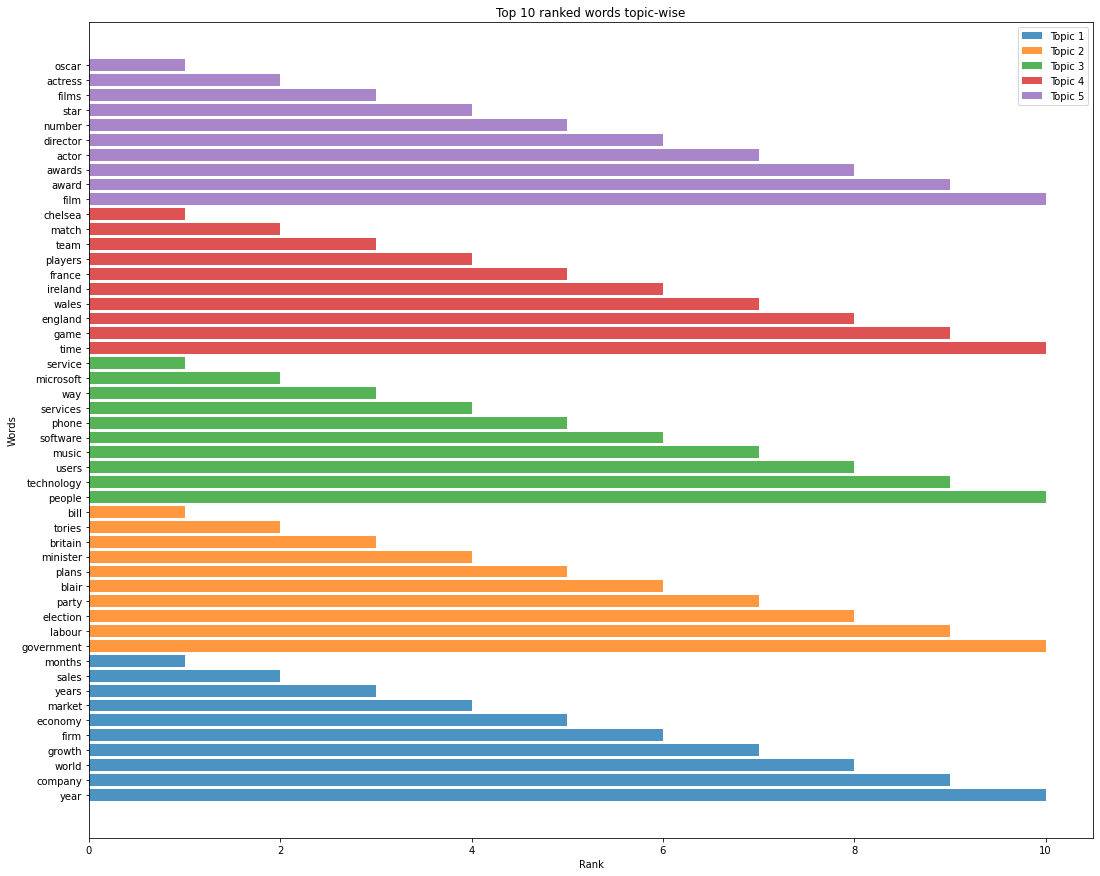

In [ ]:
import matplotlib.pyplot as plt
    
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(18, 15))
    
# Plot each word list as a horizontal bar chart
for i, word_list in enumerate(topic_words):
  ax.barh(word_list, [10 - j for j in range(10)], height=0.8, color=f'C{i}', alpha=0.8, label=f'Topic {i + 1}')
    
# Set axis labels and title
ax.set_xlabel('Rank')
ax.set_ylabel('Words')
ax.set_title('Top 10 ranked words topic-wise')
    
# Add legend
ax.legend()

    
# Show the plot
plt.show()


## **2. Hierarchical Topic Modelling**

In [ ]:
# Applying Hierarchical Community Topic algorithm on pre-processed data

community_topic.fit_hierarchical(2)

Generating network...
Finding topic communities...
Topics found in 0.13059210777282715 seconds
Sorting topics...
Topics sorted in 0.7709805965423584 seconds


In [ ]:
#  Get hierarchical topic words founded by abovr algorithm

hierarchical_topic_words = community_topic.get_topic_words_hierarchical()
print(hierarchical_topic_words)

defaultdict(<class 'dict'>, {1: {'0': ['year', 'company', 'growth', 'world', 'firm', 'economy', 'years', 'market', 'sales', 'months', 'deal', 'country', 'china', 'analysts', 'companies', 'group', 'shares', 'business', 'record', 'figures', 'oil', 'month', 'december', 'industry', 'report', 'countries', 'january', 'bank', 'dollar', 'costs', 'demand', 'state', 'sale', 'money', 'europe', 'rise', 'india', 'end', 'yukos', 'prices', 'quarter', 'profits', 'trade', 'price', 'investment', 'jobs', 'increase', 'japan', 'production', 'november', 'october', 'rate', 'debt', 'investors', 'inflation', 'level', 'exports', 'share', 'russia', 'fraud', 'unit', 'news', 'sector', 'offer', 'cost', 'bid', 'cash', 'times', 'period', 'september', 'euro', 'markets', 'rates', 'euros', 'value', 'earnings', 'development', 'consumer', 'profit', 'levels', 'fall', 'agreement', 'talks', 'airline', 'energy', 'car', 'businesses', 'order', 'gas', 'germany', 'executive', 'recovery', 'asia', 'index', 'fuel', 'banks', 'interes

In [ ]:
community_topic.get_hierarchy_tree()

defaultdict(dict,
            {'0': {'value': 'year company growth world firm economy years market sales months',
              '0': {'value': 'company firm yukos deal shares group sale oil state fraud'},
              '1': {'value': 'companies business industry jobs cost airline staff insurance businesses wage'},
              '2': {'value': 'world countries country china india trade report europe debt money'},
              '3': {'value': 'year sales december figures months quarter january month rise record'},
              '4': {'value': 'growth economy years market dollar analysts bank demand inflation rates'}},
             '1': {'value': 'government labour election party blair plans minister britain tories bill',
              '0': {'value': 'secretary shadow referendum constitution question foreign_secretary jack_straw thursday european_union treasury'},
              '1': {'value': 'court law police rights powers evidence case trial crime home_secretary'},
              '2': {'

## **3. Topic Modelling on Spanish Language**

#### **Peforming a task of topic modelling on Europarl Italian Dataset**

In [ ]:
# Load raw corpus as the dataset, here we are using Europarl English and Italian dataset.

with open("/content/drive/My Drive/europarl_it_train.txt", "r", encoding='utf-8') as f:
      europarl_it_train = f.read()
      
with open("/content/drive/My Drive/europarl_it_test.txt", "r", encoding='utf-8') as f:
      europarl_it_test = f.read()

In [ ]:
!python -m spacy download it_core_news_sm

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-25 04:42:34.626798: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-25 04:42:34.626906: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-25 04:42:34.626929: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [ ]:
# Performing pre-processing on training and testing corpus
# Keep language parameter here as per the language of your dataset

# English - "en"
# Italian - "it"
# French - "fr"
# German - "de"
# spanish - "es"

tokenized_europarl_it_train_sents, tokenized_europarl_it_train_docs, tokenized_europarl_it_test_docs, dictionary = PreProcessing.do_preprocessing(
        train=europarl_it_train,
        test=europarl_it_test,
        ner=1,
        pos_filter=3,
        phrases="npmi",
        phrase_threshold=0.35,
        language="it")

Preprocessing documents...
Preprocessing completed in 68.80279231071472 seconds


In [ ]:
# Initializing Community Topic algorithm's instance for pre-processed data

ct_europarl_it = CommunityTopic(train_corpus=tokenized_europarl_it_train_sents,  dictionary=dictionary)
ct_europarl_it.fit()

Generating network...
Finding topic communities...
Topics found in 0.06600284576416016 seconds
Sorting topics...
Topics sorted in 0.33835482597351074 seconds


In [ ]:
topic_words = ct_europarl_it.get_topics_words_topn(10)
print(topic_words)

[['sviluppo', 'politica', 'livello', 'settore', 'fondi', 'occupazione', 'particolare', 'regioni', 'programma', 'ambito'], ['commissione', 'parlamento', 'relazione', 'onorevole', 'signor_presidente', 'proposta', 'parlamento_europeo', 'questione', 'colleghi', 'discussione'], ['unione_europea', 'paesi', 'europa', 'unione', 'diritti', 'cittadini', 'diritto', 'situazione', 'accordo', 'regione'], ['membri', 'materia', 'direttiva', 'ambiente', 'sicurezza', 'applicazione', 'base', 'sistema', 'controllo', 'problemi']]


Converting above topics into English gives following as output:
(note: we have used DeepL to convert Italian topics into English - https://www.deepl.com/translator)


**List of Topics found in EuroParl Italian:**

['development', 'policy', 'level', 'sector', 'funds', 'employment', 'particular', 'regions', 'program', 'scope'] 

['committee', 'parliament', 'report', 'honorable', 'mr_president', 'proposal', 'european_parliament', 'issue', 'colleagues', 'debate']

['europe_union', 'countries', 'europe', 'union', 'rights', 'citizens', 'right', 'situation', 'agreement', 'region'] 

['members', 'matter', 'directive', 'environment', 'security', 'application', 'base', 'system', 'control', 'problems']


#### **Peforming a task of topic modelling on same Europarl Dataset but in English**

---





In [ ]:
# Load raw corpus as the dataset, here we are using Europarl English and Italian dataset.

with open("/content/drive/My Drive/europarl_en_train.txt", "r", encoding='utf-8') as f:
      europarl_en_train = f.read()
      
with open("/content/drive/My Drive/europarl_en_test.txt", "r", encoding='utf-8') as f:
      europarl_en_test = f.read()

In [ ]:
# Performing pre-processing on training and testing corpus

tokenized_europarl_en_train_sents, tokenized_europarl_en_train_docs, tokenized_europarl_en_test_docs, dictionary = PreProcessing.do_preprocessing(
        train=europarl_en_train,
        test=europarl_en_test,
        ner=1,
        pos_filter=3,
        phrases="npmi",
        phrase_threshold=0.35,
        language="en")

Preprocessing documents...
Preprocessing completed in 89.24761414527893 seconds


In [ ]:
# Initializing Community Topic algorithm's instance for pre-processed data

ct_europarl_en = CommunityTopic(train_corpus=tokenized_europarl_en_train_sents,  dictionary=dictionary)
ct_europarl_en.fit()

Generating network...
Finding topic communities...
Topics found in 0.03928971290588379 seconds
Sorting topics...
Topics sorted in 0.20667052268981934 seconds


In [ ]:
topic_words = ct_europarl_en.get_topics_words_topn(10)
print(topic_words)

[['commission', 'parliament', 'president', 'council', 'report', 'time', 'debate', 'fact', 'proposal', 'european_parliament'], ['policy', 'development', 'community', 'member_states', 'areas', 'measures', 'employment', 'regions', 'level', 'cooperation'], ['european_union', 'europe', 'countries', 'rights', 'people', 'union', 'way', 'country', 'citizens', 'situation'], ['directive', 'market', 'services', 'competition', 'principle', 'service', 'example', 'years', 'system', 'regard']]


As we can see that the english and italian produces same results, and it demostrates consistency of CT across different language.